# Домашняя работа N8. 

## Лазарев Эдуард N33471 



## Цель

Построить модель экспоненциальной однородной замкнутой сети массового
обслуживания с произвольными характеристиками.



In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

Устанавливаем начальные параметры системы.

In [2]:
NODES = 7 # Число узлов.
REQUESTS = 10 # Число заявок.

P = np.array([[0, 1, 0, 0, 0, 0, 0],
               [0.3, 0, 0.7, 0, 0, 0, 0],
               [0, 0, 0, 0.1, 0.5, 0.4, 0],
               [0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0.5, 0, 0, 0.5],
               [0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0.6, 0, 0.4, 0]]) # Матрица вероятностей передачи.

B = np.array([0, 0.3, 0.2, 0.5, 0.8, 2, 0.1]) # Длительности обслуживания узлов.

Проведём моделирование.

In [3]:
a = np.zeros(NODES) # Коэффициенты передачи.
a[0] = 1

for i in range(NODES):
    for j in range(NODES):
        a[i] = a[i] + a[j] * P[j][i]
    
l0 = 0.1
for i in range(NODES):
    a[i] /= l0

print(f"Коэффициенты передачи: {a[1:]}")

Коэффициенты передачи: [10.    7.    0.7   3.5   2.8   1.75]


In [4]:

U = np.zeros(REQUESTS + 1) # Среднее время пребывания в сети
la = np.zeros(REQUESTS + 1) # lambda-производительность
u = np.zeros((REQUESTS + 1, NODES)) # Среднее время пребывания в узле
m = np.zeros((REQUESTS + 1, NODES)) # Среднее число заявок в узле


In [5]:
for i in range(1, REQUESTS + 1):
    for j in range(1, NODES):
        u[i][j] = B[j] * (1 + m[i - 1][j])
        U[i] = U[i] + a[j] * u[i][j]
        la[i] = i / U[i]
    
    for j in range(1, NODES):
        m[i][j] = a[j] * la[i] * u[i][j]


In [6]:
print(f"Время пребывания в узле:\n{u[1:, 1:]}")
print(f"Время пребывания в сети:\n{U[1:]}")
print(f"Производительность:\n{la[1:]}")
print(f"Число заявок в узле:\n{m[1:, 1:]}")

Время пребывания в узле:
[[ 0.3         0.2         0.5         0.8         2.          0.1       ]
 [ 0.36754221  0.22101313  0.51313321  0.96810507  2.84052533  0.10131332]
 [ 0.42895581  0.2361875   0.52100442  1.1170246   3.86036918  0.10207356]
 [ 0.48206247  0.24678122  0.5257986   1.242494    5.05846479  0.10252719]
 [ 0.52589614  0.25396652  0.52874562  1.34342119  6.42477304  0.1028026 ]
 [ 0.560533    0.25871458  0.53056021  1.42117179  7.94137978  0.10297087]
 [ 0.58681637  0.26177752  0.53167264  1.47871289  9.58517286  0.1030735 ]
 [ 0.60603478  0.26371001  0.53234891  1.51976248 11.3311525   0.10313568]
 [ 0.61962564  0.2649049   0.53275572  1.54809465 13.15539398  0.103173  ]
 [ 0.6289562   0.26563046  0.5329977   1.56708411 15.03704995  0.10319515]]
Время пребывания в сети:
[13.325      17.10084428 21.20482227 25.60800527 30.27809223 35.1778879
 40.26713489 45.50584521 50.85750681 56.29119938]
Производительность:
[0.0750469  0.11695329 0.14147725 0.15620115 0.1651359  0

Найдём узловые характеристики

In [7]:
p = np.zeros(NODES) # нагрузка узлов
nu = np.zeros(NODES) # коэф простоя узла
w = np.zeros(NODES) # время ожидания заявок в узле
s = np.zeros(NODES) # время пребывания заявок в узле
l = np.zeros(NODES) # длина очереди заявок в узле
mu = np.zeros(NODES) # число заявок в узле

for i in range(1, NODES):
    p[i] = a[i] * l0 * B[i]
    nu[i] = 1 - p[i]
    w[i] = p[i] * B[i] / nu[i]
    s[i] = w[i] + B[i]
    l[i] = a[i] * l0 * w[i]
    mu[i] = a[i] * l0 * s[i]
    

In [8]:
print(f"Нагрузка узлов:\n{p[1:]}")
print(f"Коэффициент простоя:\n{nu[1:]}")
print(f"Время ожидания:\n{w[1:]}")
print(f"Время пребывания:\n{s[1:]}")
print(f"Длина очереди:\n{l[1:]}")
print(f"Число заявок:\n{mu[1:]}")

Нагрузка узлов:
[0.3    0.14   0.035  0.28   0.56   0.0175]
Коэффициент простоя:
[0.7    0.86   0.965  0.72   0.44   0.9825]
Время ожидания:
[1.28571429e-01 3.25581395e-02 1.81347150e-02 3.11111111e-01
 2.54545455e+00 1.78117048e-03]
Время пребывания:
[0.42857143 0.23255814 0.51813472 1.11111111 4.54545455 0.10178117]
Длина очереди:
[1.28571429e-01 2.27906977e-02 1.26943005e-03 1.08888889e-01
 7.12727273e-01 3.11704835e-04]
Число заявок:
[0.42857143 0.1627907  0.03626943 0.38888889 1.27272727 0.0178117 ]


Найдём сетевые характеристики замкнутой СМО

In [9]:
L = sum(l[1:])
Mu = sum(mu[1:])
W = sum(a[i + 1] * w_i for i, w_i in enumerate(w[1:]))
S = sum(a[i + 1] * s_i for i, s_i in enumerate(s[1:]))

In [10]:
print(f"Число заявок в очередях:\n{L}")
print(f"Число заявок в сети:\n{Mu}")
print(f"Время ожидания в сети:\n{W}")
print(f"Время пребывания в сети:\n{S}")

Число заявок в очередях:
0.9745594227484277
Число заявок в сети:
2.307059422748428
Время ожидания в сети:
9.745594227484276
Время пребывания в сети:
23.070594227484275


Построим график производительности и график времени пробывания

Text(0.5, 0, 'график времени пробывания')

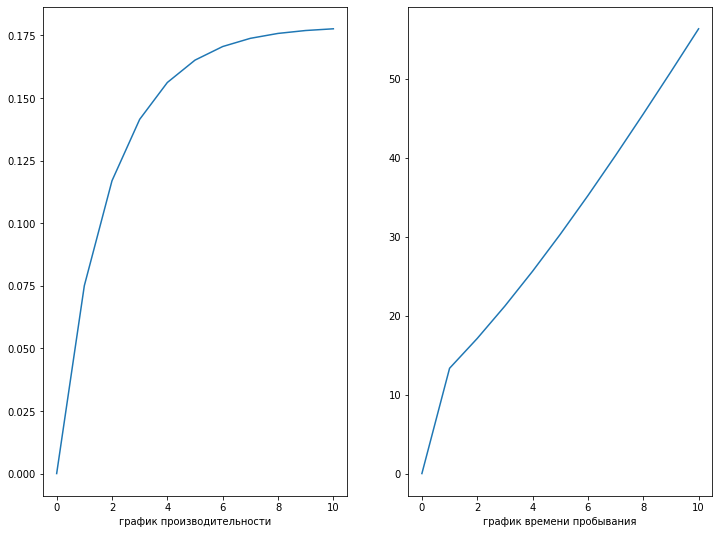

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(la)
ax1.set_xlabel("график производительности")
ax2.plot(U)
ax2.set_xlabel("график времени пробывания")